In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/Plant_Project/dataset"

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
INPUT_DIR = "/content/drive/MyDrive/Plant_Project/dataset"
OUTPUT_DIR = "/content/drive/MyDrive/Plant_Project/augmented_dataset"

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
IMAGES_PER_CLASS = 30
IMG_SIZE = 224

for plant_name in os.listdir(INPUT_DIR):
    plant_path = os.path.join(INPUT_DIR, plant_name)

    if not os.path.isdir(plant_path):
        continue

    output_plant_path = os.path.join(OUTPUT_DIR, plant_name)
    os.makedirs(output_plant_path, exist_ok=True)

    images = os.listdir(plant_path)
    if len(images) == 0:
        continue

    img_path = os.path.join(plant_path, images[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Image not readable: {img_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape((1,) + img.shape)

    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0]
        save_path = os.path.join(output_plant_path, f"{plant_name}_{i+1}.jpg")
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        i += 1
        if i >= IMAGES_PER_CLASS:
            break

In [ ]:
for plant in os.listdir(OUTPUT_DIR):
    print(plant, "->", len(os.listdir(os.path.join(OUTPUT_DIR, plant))))

Wafer_Ash -> 30
Konjac -> 30
Cinnamon_Rose -> 30
Chamomile -> 30
Jamaica_Dogwood -> 30
Inchplant -> 30
Johns_Wort -> 30
Thyme -> 30
Ginseng -> 30
Dong_Quai -> 30
Purple_Coneflower -> 30
Hyssop -> 30
Velvetleaf -> 30
Papaya -> 30
Platycodon_Balloon flower -> 30
Common_Witch_Hazel -> 30
Clove -> 30
Snowdrop -> 30
Passion flower -> 30
Amargo_Bitterwood -> 30
Fumitory -> 30
Acai -> 30
Garlic -> 30
Californian_Poppy -> 30
Vetiver -> 30
Horsetail -> 30
Summer_Savory -> 30
Flaxseed -> 30
Small_Leaved_Linden -> 30
Field_Scabious -> 30
Bay_Laurel -> 30
Elecampane -> 30
Neem -> 30
Tulsi_Or_Holy_Basil -> 30
Marigold -> 30
Trifoliate_Orange_Bitter_Orange -> 30
Kratom -> 30
Jasmine -> 30
Marsh_Mallow -> 30
Oregano -> 30
Cornflower -> 30
Cayenne -> 30
Common_Chickweed -> 30
Watercress -> 30
Minnieroot_Ffever root_Snapdragon_Root -> 30
Turmeric -> 30
Sage -> 30
Eucalyptus -> 30
Ashwagandha -> 30
Blessed_Thistle -> 30
Bitter_Orange -> 30
Hawthorn -> 30
Water_Germander -> 30
Cranberry -> 30
Chasteberry

**Dataset Split**

In [ ]:
import os
import shutil
import random

In [ ]:
SOURCE_DIR = "/content/drive/MyDrive/Plant_Project/augmented_dataset"
TARGET_DIR = "/content/drive/MyDrive/Plant_Project/final_dataset"

TRAIN_DIR = os.path.join(TARGET_DIR, "train")
VAL_DIR   = os.path.join(TARGET_DIR, "val")
TEST_DIR  = os.path.join(TARGET_DIR, "test")

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

In [ ]:
TRAIN_RATIO = 0.7
VAL_RATIO   = 0.15
TEST_RATIO  = 0.15

random.seed(42)

for plant in os.listdir(SOURCE_DIR):
    plant_path = os.path.join(SOURCE_DIR, plant)

    if not os.path.isdir(plant_path):
        continue

    images = os.listdir(plant_path)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * TRAIN_RATIO)
    val_end   = train_end + int(total * VAL_RATIO)

    splits = {
        TRAIN_DIR: images[:train_end],
        VAL_DIR:   images[train_end:val_end],
        TEST_DIR:  images[val_end:]
    }

    for split_dir, split_images in splits.items():
        class_dir = os.path.join(split_dir, plant)
        os.makedirs(class_dir, exist_ok=True)

        for img in split_images:
            src = os.path.join(plant_path, img)
            dst = os.path.join(class_dir, img)
            shutil.copy(src, dst)

In [ ]:
for split in ["train", "val", "test"]:
    path = os.path.join(TARGET_DIR, split)
    print(f"\n{split.upper()} SET:")
    for plant in os.listdir(path):
        count = len(os.listdir(os.path.join(path, plant)))
        print(f"{plant}: {count}")


TRAIN SET:
Wafer_Ash: 21
Konjac: 21
Cinnamon_Rose: 21
Chamomile: 21
Jamaica_Dogwood: 21
Inchplant: 21
Johns_Wort: 21
Thyme: 21
Ginseng: 21
Dong_Quai: 21
Purple_Coneflower: 21
Hyssop: 21
Velvetleaf: 21
Papaya: 21
Platycodon_Balloon flower: 21
Common_Witch_Hazel: 21
Clove: 21
Snowdrop: 21
Passion flower: 21
Amargo_Bitterwood: 21
Fumitory: 21
Acai: 21
Garlic: 21
Californian_Poppy: 21
Vetiver: 21
Horsetail: 21
Summer_Savory: 21
Flaxseed: 21
Small_Leaved_Linden: 21
Field_Scabious: 21
Bay_Laurel: 21
Elecampane: 21
Neem: 21
Tulsi_Or_Holy_Basil: 21
Marigold: 21
Trifoliate_Orange_Bitter_Orange: 21
Kratom: 21
Jasmine: 21
Marsh_Mallow: 21
Oregano: 21
Cornflower: 21
Cayenne: 21
Common_Chickweed: 21
Watercress: 21
Minnieroot_Ffever root_Snapdragon_Root: 21
Turmeric: 21
Sage: 21
Eucalyptus: 21
Ashwagandha: 21
Blessed_Thistle: 21
Bitter_Orange: 21
Hawthorn: 21
Water_Germander: 21
Cranberry: 21
Chasteberry: 21
Daisy: 21
Lemon_Balm: 21
Aloe_Vera: 21
Xanthoparmelia_Scabrosa: 21
Common_Hollyhock: 21
Eve

**MODEL TRAINING**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Plant_Project/final_dataset"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 150

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Plant_Project/final_dataset/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 3150 images belonging to 150 classes.


In [ ]:
import json

class_names = list(train_data.class_indices.keys())

with open("/content/drive/MyDrive/Plant_Project/class_names.json", "w") as f:
    json.dump(class_names, f)


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_gen.flow_from_directory(
    DATASET_DIR + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_gen.flow_from_directory(
    DATASET_DIR + "/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_gen.flow_from_directory(
    DATASET_DIR + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 3150 images belonging to 150 classes.
Found 600 images belonging to 150 classes.
Found 750 images belonging to 150 classes.


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False  # 🔒 freeze

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

**Callbacks (Overfitting Control)**

In [ ]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(
        "/content/drive/MyDrive/Plant_Project/best_model.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]


**TRAIN MODEL (Main Step)**

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0101 - loss: 5.3844

99/99 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.0103 - loss: 5.3810 - val_accuracy: 0.2883 - val_loss: 4.3286
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1108 - loss: 4.2940

99/99 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.1112 - loss: 4.2916 - val_accuracy: 0.7650 - val_loss: 2.5876
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3358 - loss: 3.0263

99/99 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.3363 - loss: 3.0237 - val_accuracy: 0.9300 - val_loss: 1.0861
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5767 - loss: 1.8753

99/99 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.5770 - loss: 1.8738 - val_accuracy: 0.9867 - val_loss: 0.4735
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6630 - loss: 1.3876 - val_accuracy: 0.9867 - val_loss: 0.2390
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7750 - loss: 0.9495

99/99 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.7752 - loss: 0.9489 - val_accuracy: 0.9933 - val_loss: 0.1364
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8104 - loss: 0.7608

99/99 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.8106 - loss: 0.7601 - val_accuracy: 0.9983 - val_loss: 0.0837
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.8626 - loss: 0.5609 - val_accuracy: 0.9967 - val_loss: 0.0590
Epoch 9/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8846 - loss: 0.4613 - val_accuracy: 0.9967 - val_loss: 0.0452
Epoch 10/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9200 - loss: 0.3600 - val_accuracy: 0.9967 - val_loss: 0.0311
Epoch 11/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9187 - loss: 0.3399 - val_accuracy: 0.9967 - val_loss: 0.0271
Epoch 12/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9299 - loss: 0.3056

99/99 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9299 - loss: 0.3055 - val_accuracy: 1.0000 - val_loss: 0.0218
Epoch 13/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9337 - loss: 0.2692 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 14/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9414 - loss: 0.2184 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 15/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9502 - loss: 0.2051 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 16/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9540 - loss: 0.1857 - val_accuracy: 0.9983 - val_loss: 0.0110
Epoch 17/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9592 - loss: 0.1766 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 18/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9624 - loss: 0.1543 - val_accuracy: 0.9983 - val_loss: 0.0091
Epoch 19/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9620 - loss: 0.1538 - val_accuracy: 1.0000 - val_l

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 0.0014
Test Accuracy: 100.00%


**Prediction**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [ ]:
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Plant_Project/best_model.h5"
)


In [ ]:
excel_path = "/content/drive/MyDrive/Plant_Project/plants_datas.xlsx"
df = pd.read_excel(excel_path)

df.head()

,Plant Name,Scientific Name,Benefits
0,Abscess_Root,Polemonium reptans,"It is used to reduce fever, inflammation, and ..."
1,Acai,Euterpe oleracea,Although acai berries are a longstanding food ...
2,Alder_Buckthorn,Frangula alnus,Bark (and to a lesser extent the fruit) has be...
3,Alfalfa,Medicago sativa,"The leaves are used to lower cholesterol, as w..."
4,Aloe vera,Aloe vera,"Leaves are widely used to heal burns, wounds a..."


In [ ]:
class_names = sorted(df["Plant Name"].tolist())

In [ ]:
IMG_SIZE = 224

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

In [ ]:
def predict_plant(image_path):
    img = preprocess_image(image_path)

    predictions = model.predict(img)[0]
    confidence = np.max(predictions) * 100

    # if confidence < 50:
    #     print("⚠️ Low confidence prediction")
    #     print("❌ Image not confidently recognized")
    #     return

    class_index = np.argmax(predictions)

    plant_name = class_names[class_index]

    row = df[df["Plant Name"] == plant_name].iloc[0]

    scientific_name = row["Scientific Name"]
    benefits = row["Benefits"]

    # Display image
    plt.imshow(cv2.imread(image_path)[:, :, ::-1])
    plt.axis("off")

    print("🌱 Plant Name:", plant_name)
    print("🔬 Scientific Name:", scientific_name)
    print("💊 Benefits:", benefits)
    print(f"✅ Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🌱 Plant Name: Cornflower
🔬 Scientific Name: Centaurea cyanus
💊 Benefits: In herbalism, a decoction of cornflower is effective in treating conjunctivitis and as a wash for tired eyes.
✅ Confidence: 30.67%


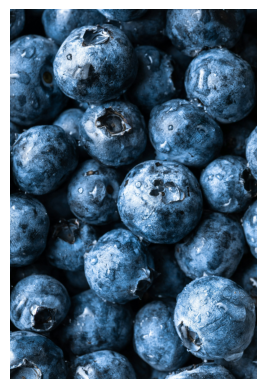

In [ ]:
test_image_path = "/content/blue.jpg"
predict_plant(test_image_path)